# Введение в анализ данных

## 1 Первое знакомство с библиотекой pandas

Библиотека `pandas` будет нашим основным инструментом в процессе анализа данных. Она содержит структуры данных и средства манипуляции данными, спроектированные с целью максимально упростить и ускорить очистку и анализ данных в Python.

Основные возможности:
* удобное чтение и запись данных из csv, txt, xls, SQL databases, HDF5;
* удобная работа с пропусками в данных;
* поиск, сортировка, выборка объектов, удовлетворяющих заданным критериям;
* возможности по соединению датасетов;
* красивая визуализация.

Основными объектами библиотеки `pandas` являются `Series` и `DataFrame`.

In [ ]:
import pandas as pd

### 1.1 Объект Series

<b>Series</b> - это <b>одномерный массив</b>, имеющий специальные <b>метки (индексы)</b> и способные хранить данные <b>любого</b> типа.

Простейший объект `Series` состоит только из массива данных:

In [ ]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

Поскольку мы не задали индекс для данных, то по умолчанию создается индекс, состоящий из целых чисел от 0 до $N$ – 1
(где $N$ – длина массива данных).

Имея объект `Series`, получить представление самого массива и его индекса можно с помощью атрибутов `values` и `index` соответственно:

In [ ]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [ ]:
obj.index

RangeIndex(start=0, stop=4, step=1)

Часто желательно создать объект `Series` с индексом, идентифицирующим каждый элемент данных:

In [ ]:
obj2 = pd.Series([4, 7, -5, 3], index=["d", "b", "a", "c"])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [ ]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

В отличие от массивов `NumPy`, для выделения одного или нескольких значений можно использовать метки в индексе:

In [ ]:
obj2["a"]

-5

In [ ]:
obj2["d"] = 6

In [ ]:
obj2[["c", "a", "d"]]

c    3
a   -5
d    6
dtype: int64

Здесь `['c', 'a', 'd']` интерпретируется как список индексов, хотя он содержит не целые числа, а строки.

Объект `Series` можно также представлять себе как упорядоченный словарь фиксированной длины, поскольку он отображает индекс на данные.

In [ ]:
obj2[obj2 > 0]

d    6
b    7
c    3
dtype: int64

In [ ]:
obj2 * 2

d    12
b    14
a   -10
c     6
dtype: int64

In [ ]:
import numpy as np
np.exp(obj2)

d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

In [ ]:
sales = {"Москва": 35000, "Красноярск": 71000, "Новосибирск": 16000, "Калининград": 5000}
obj3 = pd.Series(sales)
obj3

Москва         35000
Красноярск     71000
Новосибирск    16000
Калининград     5000
dtype: int64

### 1.2 Объект DataFrame

Датафреймы библиотеки `Pandas`, как и электронные таблицы, состоят из столбцов и строк. Каждый столбец — это объект `pandas.Series`. В каком-то смысле датафрейм похож на двумерный массив `NumPy` с метками для столбцов и индексов. Но, в отличие от него, датафрейм может содержать **разные** типы данных.


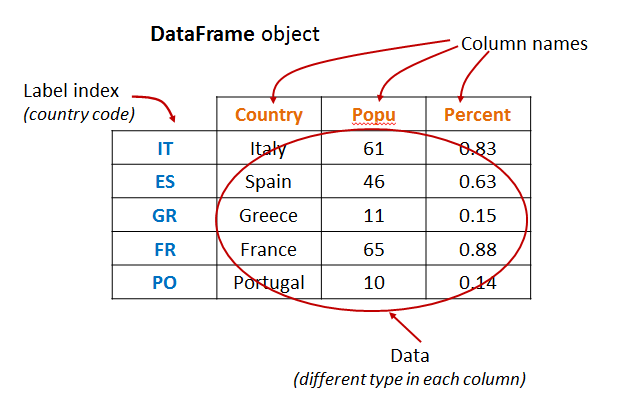

Есть много способов сконструировать объект `DataFrame`, один из самых распространенных – на основе словаря списков одинаковой длины или массивов `NumPy`:

In [ ]:
data = {'Город': ["Москва", "Москва", "Москва", "Красноярск", "Красноярск", "Красноярск"],
        'Год': [2008, 2014, 2019, 2008, 2014, 2019],
        'Население': [10425, 12108, 12615, 936, 1036, 1095]} # словарь, все значения которого - списки
df = pd.DataFrame(data)
df

,Город,Год,Население
0,Москва,2008,10425
1,Москва,2014,12108
2,Москва,2019,12615
3,Красноярск,2008,936
4,Красноярск,2014,1036
5,Красноярск,2019,1095


Столбец `DataFrame` можно извлечь как объект `Series`, воспользовавшись нотацией словарей, или с помощью атрибута:

In [ ]:
df['Город']

0        Москва
1        Москва
2        Москва
3    Красноярск
4    Красноярск
5    Красноярск
Name: Город, dtype: object

In [ ]:
df.Город

0        Москва
1        Москва
2        Москва
3    Красноярск
4    Красноярск
5    Красноярск
Name: Город, dtype: object

Строки также можно извлечь по позиции или по имени с помощью специальных атрибутов `iloc` и `loc`:

In [ ]:
df.iloc[2]

Город        Москва
Год            2019
Население     12615
Name: 2, dtype: object

In [ ]:
df.loc[1]

Город        Москва
Год            2014
Население     12108
Name: 1, dtype: object

Столбцы можно модифицировать путем присваивания.

In [ ]:
df['Население'] *= 1000
df

,Город,Год,Население
0,Москва,2008,10425000
1,Москва,2014,12108000
2,Москва,2019,12615000
3,Красноярск,2008,936000
4,Красноярск,2014,1036000
5,Красноярск,2019,1095000


Когда столбцу присваивается список или массив, длина значения должна совпадать с длиной `DataFrame`.

Присваивание несуществующему столбцу приводит к созданию нового столбца.

In [ ]:
df['Площадь'] = [2511, 2511, 2511, 348, 348, 348]
df

,Город,Год,Население,Площадь
0,Москва,2008,10425000,2511
1,Москва,2014,12108000,2511
2,Москва,2019,12615000,2511
3,Красноярск,2008,936000,348
4,Красноярск,2014,1036000,348
5,Красноярск,2019,1095000,348


Для удаления столбцов служит ключевое слово `del`, как и в обычном словаре.

In [ ]:
df['Плотность (чел./км2)'] = (df['Население'] / df['Площадь']).round().astype('int')
del df['Население']
del df['Площадь']
df

,Город,Год,Плотность (чел./км2)
0,Москва,2008,4152
1,Москва,2014,4822
2,Москва,2019,5024
3,Красноярск,2008,2690
4,Красноярск,2014,2977
5,Красноярск,2019,3147


Еще одна распространенная форма данных – словарь словарей. Если передать вложенный словарь объекту `DataFrame`, то `pandas` интерпретирует ключи внешнего словаря как столбцы, а ключи внутреннего словаря – как индексы строк:

In [ ]:
data = {"Москва": {2008: 10425, 2014: 12108, 2019: 12615},
        "Красноярск": {2008: 936, 2014: 1036, 2019: 1095}}

populations = pd.DataFrame(data)
populations

,Москва,Красноярск
2008,10425,936
2014,12108,1036
2019,12615,1095


Объект `DataFrame` можно транспонировать (переставить местами строки и столбцы), воспользовавшись таким же синтаксисом, как для словарей `NumPy`:

In [ ]:
populations.T

,2008,2014,2019
Москва,10425,12108,12615
Красноярск,936,1036,1095


Еще один пример:

In [ ]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'), # временнАя метка
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'), # Серия на основе списка
                    'D': np.array([3] * 4, dtype='int32'), # массив целых чисел NumPy
                    'E': pd.Categorical(["test", "train", "test", "train"]), # категории
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Столбцы итогового [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) имеют разные [типы данных](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes), в зависимости от того, что за данные хранятся в столбце.

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

Несмотря на то, что датафрейм можно формировать из словарей и списков, большую часть времени мы будем создавать их из существующих источников данных. Файлы — самые распространенные среди них. `Pandas` поддерживает функции для создания датафреймов из многих распространенных типов файлов, включая CSV, Excel, HTML, JSON и подключения к базе данных SQL.
`Pandas` предоставляет функцию `read_csv()` для чтения данных, хранящихся в виде CSV-файла, и преобразования их в `DataFrame`.
Проведом анализ данных о пассажирах "Титаника".

Каждая строчка набора данных содержит следующие поля:
- `PassengerId` — номер пассажира;
- `Survived` — выжил данный пассажир или нет (0 для умерших, 1 для выживших);
- `Pclass` — класс пассажира (1 — высший, 2 — средний, 3 — низший);
- `Name` — имя;
- `Sex` — пол;
- `Age` — возраст;
- `SibSp` — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;
- `Parch` — количество родителей, детей (в том числе приемных) на борту титаника;
- `Ticket` — номер билета;
- `Fare` — плата за проезд;
- `Cabin` — каюта;
- `Embarked` — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

In [ ]:
titanic = pd.read_csv("titanic.csv")

При отображении `DataFrame` по умолчанию отображаются первые и последней 5 строк:

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Иногда удобно вывести не целый `DataFrame`, заполнив экран данными, а выбрать несколько строк. Например, с помощью метода `head()` можно вывести первые 5 строк:

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Первые 8 строк:

In [ ]:
titanic.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


C помощью метода `tail()` получим последние 5 строк:

In [ ]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


С помощью метода `sample()` получим 5 случайных строк:

In [ ]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
460,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
504,505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.5000,B79,S
418,419,0,2,"Matthews, Mr. William John",male,30.0,0,0,28228,13.0000,NaN,S


С помощью метода `take()` получим 5, 15 и 125 строки:

In [ ]:
titanic.take([5, 15, 125])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C


Посмотрим размер таблички (число наблюдений, число признаков):

In [ ]:
titanic.shape

(891, 15)

С помощью обращения к атрибуту `dtypes` можно проверить, какие типы данных хранятся в столбцах таблицы:

In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Типы данных в этом `DataFrame` - целые числа (`int64`), числа с плавающей точкой (`float64`) и строки (`object`).
При запросе `dtypes` скобки не используются! `dtypes` является атрибутом `DataFrame` и `Series`. Атрибуты представляют собой характеристику `DataFrame` / `Series`, тогда как метод (для которого требуются скобки) что-то делает с `DataFrame` / `Series`.

Техническом детали `DataFrame`:

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Названия столбцов:

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Названия строк:

In [ ]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

После просмотра некоторых строк датафрейма и технической информации попробуем получить представление о форме данных. В этом может помочь метод `describe`, позволяющий получить описательную статистику данных.

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Этот метод вычисляет количество, среднее и стандартное отклонение, минимум, максимум и квантили для столбцов с числовыми данными. По этим статистикам можно понять, одинаковый ли масштаб имеют признаки (например, Age измеряется от 0 до 80, а Pclass в единицах - от 1 до 3). Также можно понять, есть ли пропуски в данных (по count). Например, в графе Age есть пропуски.

<Axes: >

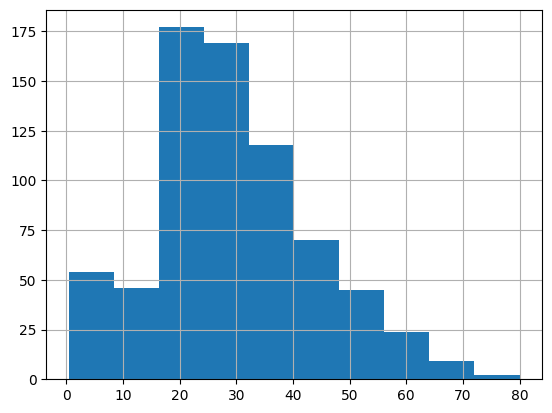

In [ ]:
titanic["Age"].hist()

Чтобы просмотреть статистику, рассчитанную из нечисловых столбцов, укажите типы данных для обработки. Это можно сделать с помощью ключевого слова `include`:

In [ ]:
titanic.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Уникальные значения в столбце:

In [ ]:
set(titanic["Sex"])

{'female', 'male'}

In [ ]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

Уникальные значения в столбце с числом строк с таким значением:

In [ ]:
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Итак, для строк мы получаем количество, число уникальных значений, верхнее значение и его частоту.

После первичного просмотра фрейма с помощью `head` и `tail` и получения представления о форме данных с помощью `describe` можно начать просматривать данные
и отдельные столбцы, строки или ячейки.

Попробуем получить информацию о пассажире и его билете:

In [ ]:
titanic[['Name', 'Ticket']].head()

,Name,Ticket
0,"Braund, Mr. Owen Harris",A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,"Allen, Mr. William Henry",373450


Синтаксис скобок перегружен, чтобы мы смогли захватить как строки, так и столбцы. Для указания строк нужно использовать срез в качестве аргумента. Если он использует целые числа, то они представляют возвращаемые номера строк.

Например, для возврата строк 3, 4 и 5 из датафрейма мы можем использовать срез 3:6:

In [ ]:
# Зададим столбец Name для названий строк (index):
titanic = titanic.set_index('Name')
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Теперь строки индексируются с помощью `Name` (выделено жирным в начале каждой строки).

In [ ]:
titanic[3:6]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q


Срез можно производить и с помощью меток индексов. При их использовании будет включено последнее значение.

In [ ]:
titanic['Heikkinen, Miss. Laina': 'Moran, Mr. James']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
"Moran, Mr. James",6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q


**Оптимизированный доступ по метке**

С помощью индексатора `loc` получим информацию о пассажире Palsson, Master. Gosta Leonard:

In [ ]:
titanic.loc['Palsson, Master. Gosta Leonard']

PassengerId         8
Survived            0
Pclass              3
Sex              male
Age               2.0
SibSp               3
Parch               1
Ticket         349909
Fare           21.075
Cabin             NaN
Embarked            S
Name: Palsson, Master. Gosta Leonard, dtype: object

Второй необязательный аргумент может указывать, какой столбец возвращать. Например, получим информацию о возрасте, кол-ве братьев, сестер или супругов на борту и кол-ве родителей или детей, с которыми путешествовал пассажир Palsson, Master. Gosta Leonard:

In [ ]:
titanic.loc['Palsson, Master. Gosta Leonard', ['Age','SibSp','Parch']]

Age      2.0
SibSp      3
Parch      1
Name: Palsson, Master. Gosta Leonard, dtype: object

**Оптимизированный доступ по позиции**

С помощью индексатора `iloc` получим информацию о пассажире, который записан в третьей строке датафрейма:

In [ ]:
titanic.iloc[3]

PassengerId         4
Survived            1
Pclass              1
Sex            female
Age              35.0
SibSp               1
Parch               0
Ticket         113803
Fare             53.1
Cabin            C123
Embarked            S
Name: Futrelle, Mrs. Jacques Heath (Lily May Peel), dtype: object

Используя второй срез, можно указать, какой столбец возвращать:

In [ ]:
titanic.iloc[1:4, -4:]

,Ticket,Fare,Cabin,Embarked
Name,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,S


In [ ]:
titanic = titanic.reset_index()
titanic

,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C


**Маски и фильтрация**

Полезная особенность датафрейма — способность выбирать данные на основе значений. Мы можем использовать операторы сравнения И (&), ИЛИ (|) и НЕ (~) со столбцами, чтобы увидеть, какие значения удовлетворяют определенным условиям. Операторы & или | применяются для объединения и создания более сложных условий, а ~ — для создания маски, противоположной условию.

Например, выведем информация о пассажирах-мужчинах 1 класса:

In [ ]:
mask = (titanic.Sex == 'male') & (titanic.Pclass == 1)
mask

Name
Braund, Mr. Owen Harris                                False
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    False
Heikkinen, Miss. Laina                                 False
Futrelle, Mrs. Jacques Heath (Lily May Peel)           False
Allen, Mr. William Henry                               False
                                                       ...  
Montvila, Rev. Juozas                                  False
Graham, Miss. Margaret Edith                           False
Johnston, Miss. Catherine Helen "Carrie"               False
Behr, Mr. Karl Howell                                   True
Dooley, Mr. Patrick                                    False
Length: 891, dtype: bool

Здесь создается объект `pandas.Series` со значением `True` для каждой строки, удовлетворяющей условию.

In [ ]:
titanic[mask]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Sloper, Mr. William Thompson",24,1,1,male,28.0,0,0,113788,35.5000,A6,S
"Fortune, Mr. Charles Alexander",28,0,1,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
"Uruchurtu, Don. Manuel E",31,0,1,male,40.0,0,0,PC 17601,27.7208,NaN,C
"Meyer, Mr. Edgar Joseph",35,0,1,male,28.0,1,0,PC 17604,82.1708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
"Marechal, Mr. Pierre",840,1,1,male,NaN,0,0,11774,29.7000,C47,C
"Daly, Mr. Peter Denis",858,1,1,male,51.0,0,0,113055,26.5500,E17,S
"Roebling, Mr. Washington Augustus II",868,0,1,male,31.0,0,0,PC 17590,50.4958,A24,S


In [ ]:
titanic[titanic['Sex'].isin(['female'])] # фильтруем

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,3,female,27.0,0,2,347742,11.1333,NaN,S
"Nasser, Mrs. Nicholas (Adele Achem)",10,1,2,female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
"Shelley, Mrs. William (Imanita Parrish Hall)",881,1,2,female,25.0,0,1,230433,26.0000,NaN,S
"Dahlberg, Miss. Gerda Ulrika",883,0,3,female,22.0,0,0,7552,10.5167,NaN,S
"Rice, Mrs. William (Margaret Norton)",886,0,3,female,39.0,0,5,382652,29.1250,NaN,Q


**Работа с пропусками**

`Pandas` в основном использует значение [`np.nan`](https://numpy.org/doc/stable/user/misc.html) для представления отсутствующих данных. По умолчанию они не включается в вычисления.

In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Чтобы удалить строки, в которых отсутствуют данные, воспользуемся методом `dropna()`:

In [ ]:
titanic_not_na = titanic.dropna()
titanic_not_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, Cumings, Mrs. John Bradley (Florence Briggs Thayer) to Behr, Mr. Karl Howell
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Sex          183 non-null    object 
 4   Age          183 non-null    float64
 5   SibSp        183 non-null    int64  
 6   Parch        183 non-null    int64  
 7   Ticket       183 non-null    object 
 8   Fare         183 non-null    float64
 9   Cabin        183 non-null    object 
 10  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 17.2+ KB


Заполнение недостающих данных:

In [ ]:
titanic.take([31, 56, 65])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Spencer, Mrs. William Augustus (Marie Eugenie)",32,1,1,female,NaN,1,0,PC 17569,146.5208,B78,C
"Rugg, Miss. Emily",57,1,2,female,21.0,0,0,C.A. 31026,10.5000,NaN,S
"Moubarek, Master. Gerios",66,1,3,male,NaN,1,1,2661,15.2458,NaN,C


In [ ]:
titanic.fillna(value=0).take([31, 56, 65])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Spencer, Mrs. William Augustus (Marie Eugenie)",32,1,1,female,0.0,1,0,PC 17569,146.5208,B78,C
"Rugg, Miss. Emily",57,1,2,female,21.0,0,0,C.A. 31026,10.5000,0,S
"Moubarek, Master. Gerios",66,1,3,male,0.0,1,1,2661,15.2458,0,C


In [ ]:
titanic.fillna(value=titanic.mean()).take([31, 56, 65])

C:\Users\anrfe\AppData\Local\Temp\ipykernel_7228\3097319376.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.fillna(value=titanic.mean()).take([31, 56, 65])


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Spencer, Mrs. William Augustus (Marie Eugenie)",32,1,1,female,29.699118,1,0,PC 17569,146.5208,B78,C
"Rugg, Miss. Emily",57,1,2,female,21.000000,0,0,C.A. 31026,10.5000,NaN,S
"Moubarek, Master. Gerios",66,1,3,male,29.699118,1,1,2661,15.2458,NaN,C


In [ ]:
titanic.fillna(value=titanic.median()).take([31, 56, 65])

C:\Users\anrfe\AppData\Local\Temp\ipykernel_7228\2289413957.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.fillna(value=titanic.median()).take([31, 56, 65])


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Spencer, Mrs. William Augustus (Marie Eugenie)",32,1,1,female,28.0,1,0,PC 17569,146.5208,B78,C
"Rugg, Miss. Emily",57,1,2,female,21.0,0,0,C.A. 31026,10.5000,NaN,S
"Moubarek, Master. Gerios",66,1,3,male,28.0,1,1,2661,15.2458,NaN,C


**Работа с дубликатами**

In [ ]:
titanic.duplicated().sum()

0

**Управление данными**

Перекодирование столбца с помощью функции `map`:

In [ ]:
sex = titanic["Sex"]
sex.map({"male":1, "female":-1}).head()

Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)   -1
Heikkinen, Miss. Laina                                -1
Futrelle, Mrs. Jacques Heath (Lily May Peel)          -1
Allen, Mr. William Henry                               1
Name: Sex, dtype: int64

Функция `apply`: применение функции поэлементно к столбцу или строке

In [ ]:
def func(x):
    return x + 100

In [ ]:
titanic["NewAge"] = titanic["Age"].apply(lambda x: x+100)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge
Name,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,122.0
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,138.0
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,126.0
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,135.0
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,135.0


Полезные статистические методы:
- `.sum()` – сумма элементов;
- `.count()` – количество появлений элемента;
- `.mean()` – среднее элементов;
- `.min()` – минимальный элемент;
- `.max()` – максимальный элемент.

In [ ]:
titanic['Age'].mean()

29.69911764705882

Сортировка данных:

In [ ]:
titanic.sort_values(by='Age', ascending=False)

,index,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,Family
630,630,"Barkworth, Mr. Algernon Henry Wilson",631,1,1,male,80.0,0,0,27042,30.0000,A23,S,180.0,Barkworth
851,851,"Svensson, Mr. Johan",852,0,3,male,74.0,0,0,347060,7.7750,NaN,S,174.0,Svensson
493,493,"Artagaveytia, Mr. Ramon",494,0,1,male,71.0,0,0,PC 17609,49.5042,NaN,C,171.0,Artagaveytia
96,96,"Goldschmidt, Mr. George B",97,0,1,male,71.0,0,0,PC 17754,34.6542,A5,C,171.0,Goldschmidt
116,116,"Connors, Mr. Patrick",117,0,3,male,70.5,0,0,370369,7.7500,NaN,Q,170.5,Connors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,859,"Razi, Mr. Raihed",860,0,3,male,NaN,0,0,2629,7.2292,NaN,C,NaN,Razi
863,863,"Sage, Miss. Dorothy Edith ""Dolly""",864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,Sage
868,868,"van Melkebeke, Mr. Philemon",869,0,3,male,NaN,0,0,345777,9.5000,NaN,S,NaN,van Melkebeke
878,878,"Laleff, Mr. Kristo",879,0,3,male,NaN,0,0,349217,7.8958,NaN,S,NaN,Laleff


Функция `groupby`: создание групп по значению какого-то столбца (или группы столбцов)

In [ ]:
titanic.groupby("Sex")['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Создаем столбец с фамилией:

In [ ]:
titanic.reset_index(inplace=True)
titanic

,index,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge
0,0,"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,122.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,138.0
2,2,"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,126.0
3,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,135.0
4,4,"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,"Montvila, Rev. Juozas",887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,127.0
887,887,"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S,119.0
888,888,"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,889,"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C,126.0


In [ ]:
titanic["Family"] = titanic['Name'].apply(lambda s: s.split(",")[0])
titanic.head()

,index,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NewAge,Family
0,0,"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,122.0,Braund
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,138.0,Cumings
2,2,"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,126.0,Heikkinen
3,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S,135.0,Futrelle
4,4,"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,135.0,Allen


In [ ]:
titanic.groupby("Family")["Name"].count().head()

Family
Abbing     1
Abbott     2
Abelson    2
Adahl      1
Adams      1
Name: Name, dtype: int64

In [ ]:
titanic["Family"].value_counts()

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: Family, Length: 667, dtype: int64

Сколько семей было на корабле, в которых больше трех человек?

In [ ]:
(titanic.groupby("Family")["Name"].count() > 3).sum()

16

## Подведем итог

Датафреймы `Pandas` — мощный инструмент для работы с данными в среде, похожей на электронную таблицу. Создавать их можно из многих ресурсов, но создание
из файла — самое распространенное. Мы можем расширить датафрейм новыми столбцами и строками.
Мы можем получить доступ к данным с помощью индексаторов, которые допускается использовать и чтобы задавать эти самые данные. Датафрейм предоставляет отличный способ для изучения данных и управления ими.

## Задания к лекции
**Задача 1.** Какова доля семей, в которых минимальный возраст меньше 20 (семьи с детьми)?

**Задача 2.** Какова доля выживших пассажиров из класса 3? А пассажиров из класса 1?

**Задача 3.** Сколько пассажиров выжило, а сколько - нет?

**Задача 4.** Создайте столбец "IsChild", который равен 1, если возраст меньше 20, и 0 иначе. Для пропущенных значений поведение функции может быть произвольным.

**Задача 5.** Какова доля выживших женщин из первого класса? А доля выживших мужчин из 3 класса?